Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Соловьев Даниил"
COLLABORATORS = "БПМ184"

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math:: f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        # YOUR CODE HERE
        m = self.xk.shape[0]
        res = 0
        for k in range(m):
            numerator = 1
            denominator = 1
            for j in range(m):
                if j != k:
                    numerator *= (x - self.xk[j])
                    denominator *= (self.xk[k] - self.xk[j])
            res += (self.yk[k] * numerator / denominator)
            
        return res
    
        raise NotImplementedError()

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


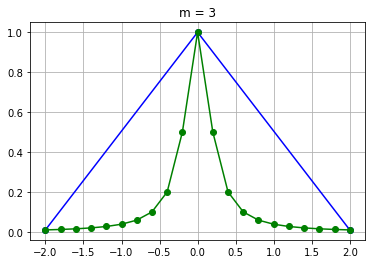

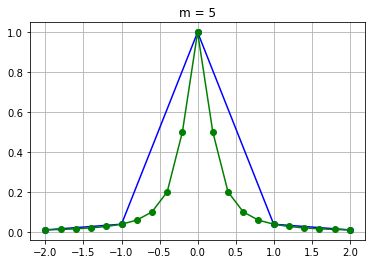

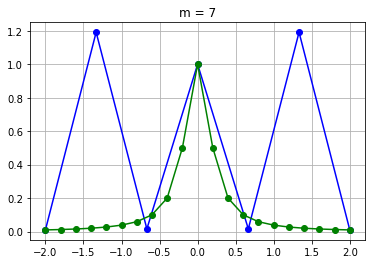

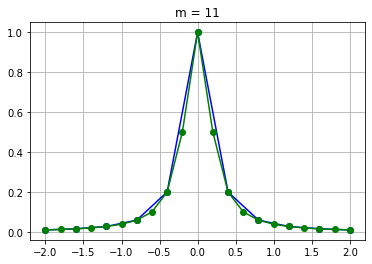

In [4]:
# YOUR CODE AND COMMENTS HERE (5 pts, manually graded)
import matplotlib.pyplot as plt

for elm in [3, 5, 7, 11]:
    mass_x = np.linspace(-2, 2, elm)
    mass_y = np.array([lagr(xval) for xval in mass_x])
    plt.plot(mass_x, mass_y, 'bo-')
    plt.plot(xx, yy, 'go-')
    plt.title('m = {}'.format(elm))
    plt.grid()
    plt.show()

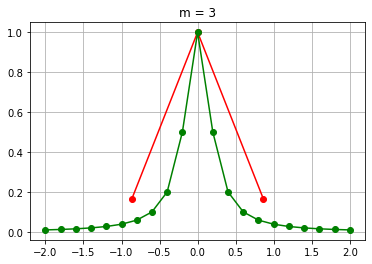

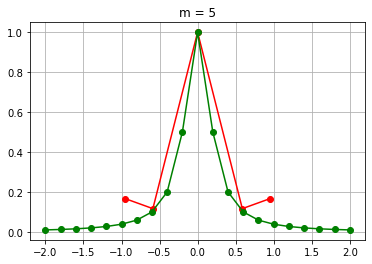

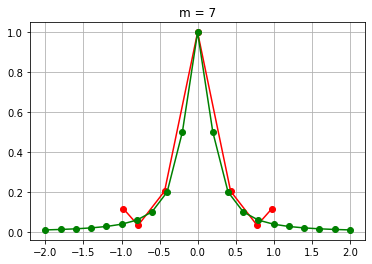

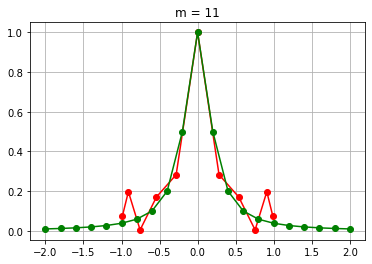

In [5]:
import math
def cheb_nodes(a, b, n): #k = 1,...,n
    mass = []
    for k in range(1, n + 1):
        mass.append(0.5*(a + b) + 0.5*(b - a)*np.cos(math.pi*(2*k - 1)/(2*n)))
    return mass

a = -1; b = 1
for elm in [3, 5, 7, 11]:
    mass_x = cheb_nodes(a, b, elm)
    mass_y = np.array([lagr(xval) for xval in mass_x])
    plt.plot(mass_x, mass_y, 'ro-')
    plt.plot(xx, yy, 'go-')
    plt.title('m = {}'.format(elm))
    plt.grid()
    plt.show()